# Observation and Analysis

1. Capomulin and Ramicane had more data points collected, which implies a greater accuracy in results than the other drugs tested.
2. Ramicane and Infubinol both appear more normally distributed as the mean is closer to the middle in the box plot.
3. Both Capomulin and Ramicane appear more effective than the other treatment regimen.
4. Capomulin shows promising results over 45 days, however at the tail of it the tumor size appears to be growing again.
5. The mouse weight and tumor volume also have a positive correlation, which means the bigger the mouse the greater the tumor in most cases. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

mouse_data = pd.read_csv("Resources/Mouse_metadata.csv")
study_results = pd.read_csv("Resources/Study_results.csv")

In [2]:
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_data['Mouse ID'].count()

249

In [5]:
study_results['Mouse ID'].value_counts()

g989    13
c766    10
c139    10
z581    10
y260    10
        ..
x226     1
b447     1
u153     1
t573     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
merged_df = pd.merge(mouse_data, study_results, on='Mouse ID')
merged_df = merged_df[merged_df['Mouse ID'] != 'g989']
merged_df['Mouse ID'].value_counts()

c264    10
a275    10
a444    10
c758    10
z969    10
        ..
x226     1
u153     1
v199     1
d133     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

In [7]:
len(merged_df['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
stats = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem']).rename(columns={'var': 'variance',
                                                                                                                   'std': 'standard deviation',
                                                                                                                    'sem': 'SEM'})
formatted = stats[['mean', 'median', 'variance', 'standard deviation', 'SEM']].applymap('{:.3f}'.format)
formatted.head()

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596


## Bar and Pie Charts

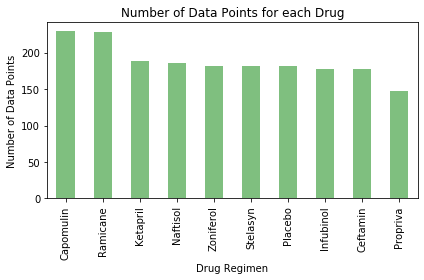

In [9]:
#Pandas
data = merged_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
pd_bar = data.plot(kind='bar', title='Number of Data Points for each Drug', color='green', alpha=0.5)
pd_bar.set_ylabel('Number of Data Points')
plt.tight_layout()
plt.show()

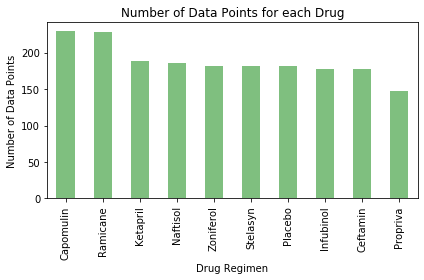

In [10]:
# Matplotlib
x_axis = np.arange(len(merged_df['Drug Regimen'].unique()))
tick_locations = [value for value in x_axis]
y_axis = merged_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

plt.bar(x_axis, y_axis, color='g', alpha=0.5, width=0.5)
plt.xticks(tick_locations, list(y_axis.index), rotation='vertical')

plt.title('Number of Data Points for each Drug')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.xlim(-0.5, len(x_axis)-0.5)

plt.tight_layout()
plt.show()

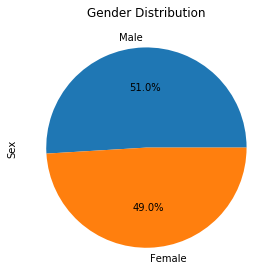

In [11]:
# Pandas
gender_data = merged_df.groupby('Sex')['Sex'].count().sort_values(ascending=False)
pd_pie = gender_data.plot(kind='pie', autopct="%1.1f%%", title='Gender Distribution')

plt.tight_layout()
plt.show()

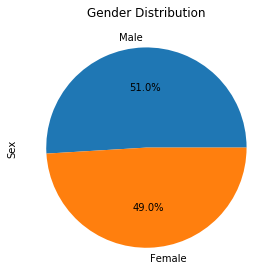

In [12]:
# Matplotlib
labels = ['Male', 'Female']

plt.pie(gender_data, labels=labels, autopct="%1.1f%%")

plt.title('Gender Distribution')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
last = merged_df.drop_duplicates('Mouse ID', 'last').sort_values('Mouse ID').reset_index().drop(columns='index')
last

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol=last.loc[last['Drug Regimen']==drug,'Tumor Volume (mm3)']   
#     print(vol)
    # add subset to tumor volume data list
    tumor_vol_list.append(vol)
    
#     Determine outliers using upper and lower bounds
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    outliers = vol.loc[(vol<lower_bound) | (vol>upper_bound)]
    
    print(f"{drug}'s potential outliers are: {outliers}")

Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


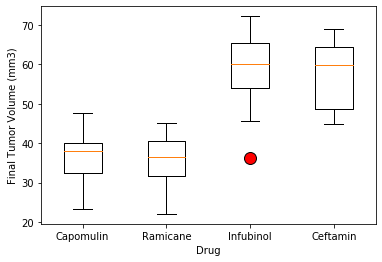

In [15]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=12)

fig1, ax1 = plt.subplots()
ax1.set_xticklabels(treatment_list)
ax1.set_xlabel('Drug')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list, flierprops=flierprops)
plt.show()

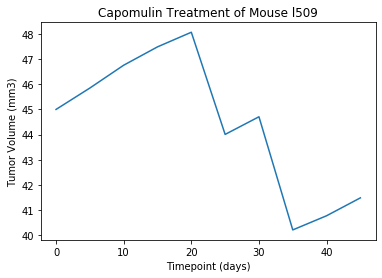

In [16]:
x_axis = merged_df.loc[merged_df['Mouse ID']=='l509', 'Timepoint']
y_axis = merged_df.loc[merged_df['Mouse ID']=='l509', 'Tumor Volume (mm3)']

plt.plot(x_axis,y_axis)

plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

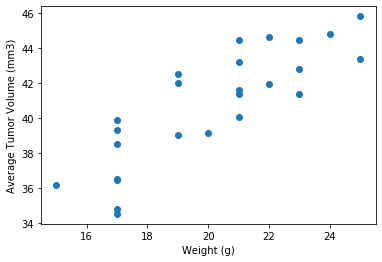

In [17]:
filtered_capo = merged_df.loc[merged_df['Drug Regimen']=='Capomulin'][['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
groupby_mouse = filtered_capo.groupby('Mouse ID').mean()

x_axis = groupby_mouse['Weight (g)']
y_axis = groupby_mouse['Tumor Volume (mm3)']

plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


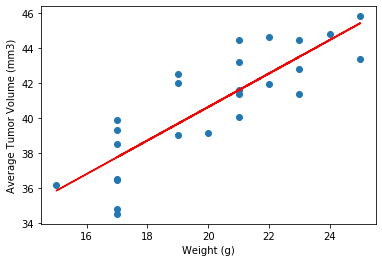

In [18]:
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.show()